In [1]:
import treecorr as tc
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import fits

quasar_all = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSS16Q/DR16Q_v4.fits')

In [2]:
quasar = np.load('../catalogue/quasar_narrow_z_cut.npy')
random = np.load('../catalogue/random_sample_quasar_narrow_z_cut.npy')

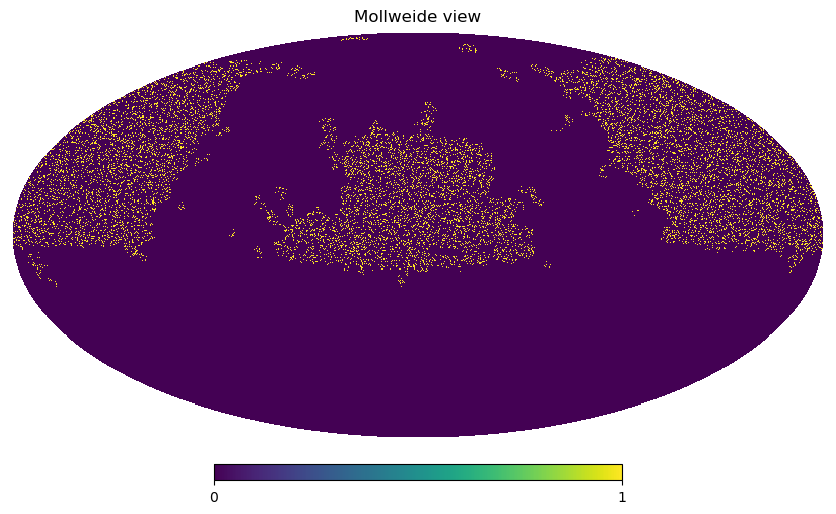

In [32]:
image = np.zeros(hp.nside2npix(2048))
image[hp.ang2pix(2048, np.deg2rad(90-random['dec']), np.deg2rad(random['ra']))] = 1
hp.mollview(image)

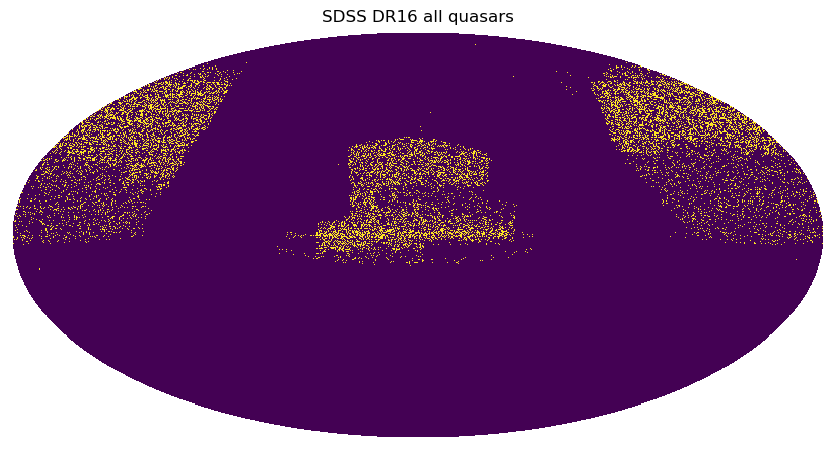

In [61]:
nside = 1024
npix = hp.ang2pix(nside, np.deg2rad(90 - quasar_all['dec']), np.deg2rad(quasar_all['ra']))
image = np.zeros(hp.nside2npix(nside))
image[npix] = 1
hp.mollview(image, title='SDSS DR16 all quasars', cbar=False)
plt.savefig('./fig/all_quasar')

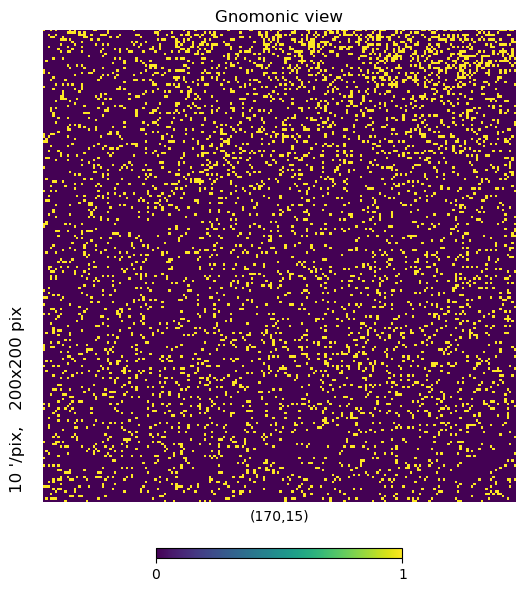

In [35]:
hp.visufunc.gnomview(image, rot=(170, 15, 0), reso=10)

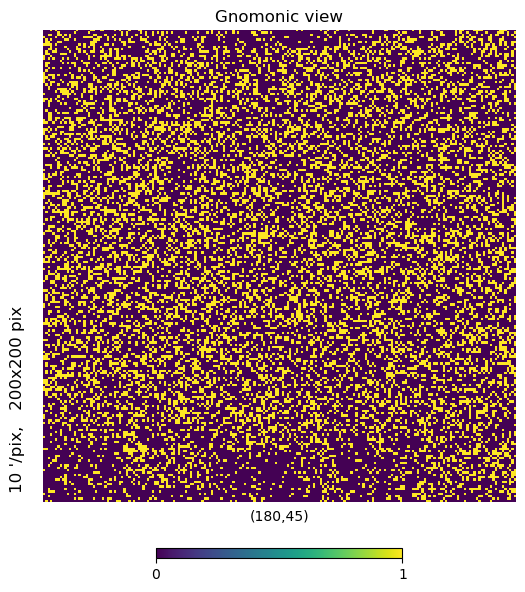

In [19]:
hp.visufunc.gnomview(image, rot=(180, 45, 0), reso=10)

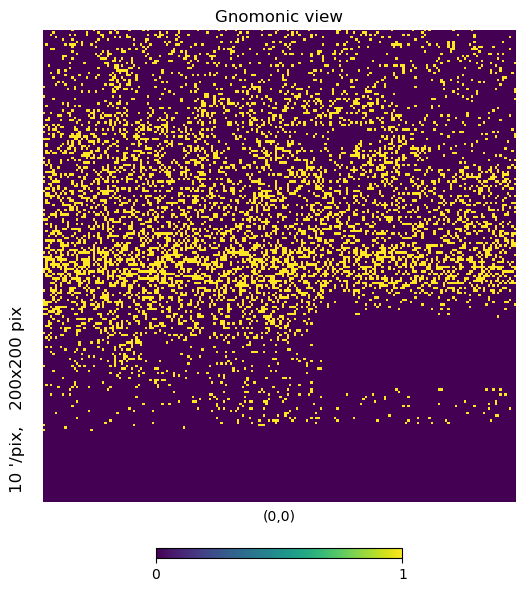

In [12]:
hp.visufunc.gnomview(image, rot=(0, 0, 0), reso=10)

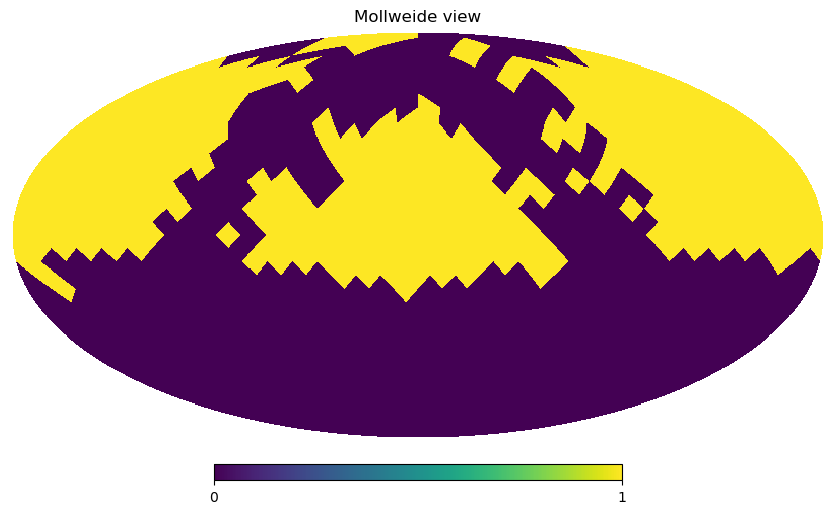

In [53]:
nside = 8
npix = hp.ang2pix(nside, np.deg2rad(90 - quasar_all['dec']), np.deg2rad(quasar_all['ra']))
image = np.zeros(hp.nside2npix(nside))
image[npix] = 1
hp.mollview(image)

In [54]:
pos1 = hp.ang2pix(nside, np.deg2rad(90 - 15), np.deg2rad(180))
pos1_1 = hp.ang2pix(nside, np.deg2rad(90 - 15), np.deg2rad(160))
pos1_2 = hp.ang2pix(nside, np.deg2rad(90 - 15), np.deg2rad(170))
pos2 = hp.ang2pix(nside, np.deg2rad(90 - 45), np.deg2rad(180))
pos2_1 = hp.ang2pix(nside, np.deg2rad(90 - 45), np.deg2rad(160))
pos2_2 = hp.ang2pix(nside, np.deg2rad(90 - 45), np.deg2rad(170))

In [55]:
sub1 = quasar_all[npix==pos1]
sub2 = quasar_all[npix==pos2]

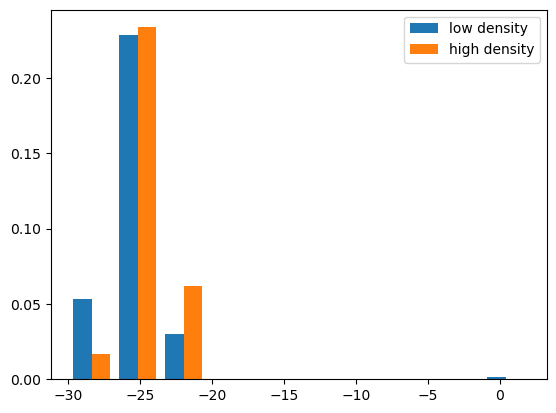

In [57]:
plt.hist((sub1['M_I'], sub2['M_I']), density=True, label=['low density', 'high density'])
plt.legend()

random_point

In [30]:
npix = np.unique(npix)
mask = np.zeros(hp.nside2npix(nside), bool)
mask[npix] = True
random_theta = np.arccos(np.random.uniform(-1, 1, len(quasar)*100))
random_phi = np.random.uniform(0, np.pi*2, len(quasar)*100)
within_mask = mask[hp.ang2pix(nside, random_theta, random_phi)]

In [31]:
random_theta = random_theta[within_mask]
random_phi = random_phi[within_mask]

In [34]:
random = np.zeros(len(random_phi), dtype=quasar.dtype)
random['ra'] = np.rad2deg(random_phi)
random['dec'] = 90 - np.rad2deg(random_theta)
random['w'] = 1
random['z'] = np.random.choice(quasar['z'], len(random_phi))

In [35]:
np.save('../catalogue/random_new_test', random)

Apply mask to random

In [47]:
random = np.load('../catalogue/random_new_test.npy')

In [6]:
np.savetxt('../tmp/jrd_radec', np.c_[random['ra'], random['dec']])

In [43]:
import pandas as pd
from astropy.io import fits
rd_mask = pd.read_csv('../tmp/rd_n', sep='\\s+')
mask_n = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSSDR12/cmass/mask_DR12v5_CMASS_North.fits')
mask_s = fits.getdata('/uufs/chpc.utah.edu/common/home/astro/zheng/hd/data/SDSSDR12/cmass/mask_DR12v5_CMASS_South.fits')

In [44]:
id_rd = np.array(rd_mask['polygon_ids'])
id_rd[np.isnan(id_rd)] = -99
id_rd = id_rd.astype(int)
weight = np.zeros(len(id_rd))
weight[id_rd==-99] = np.nan
weight[id_rd!=-99] = (mask_n['WEIGHT'] + mask_s['WEIGHT'])[id_rd[id_rd!=-99]]

In [45]:
accept = ~(np.logical_or(np.isnan(weight), np.isclose(weight, 0)))

In [48]:
random['w'] = weight
random = random[accept]

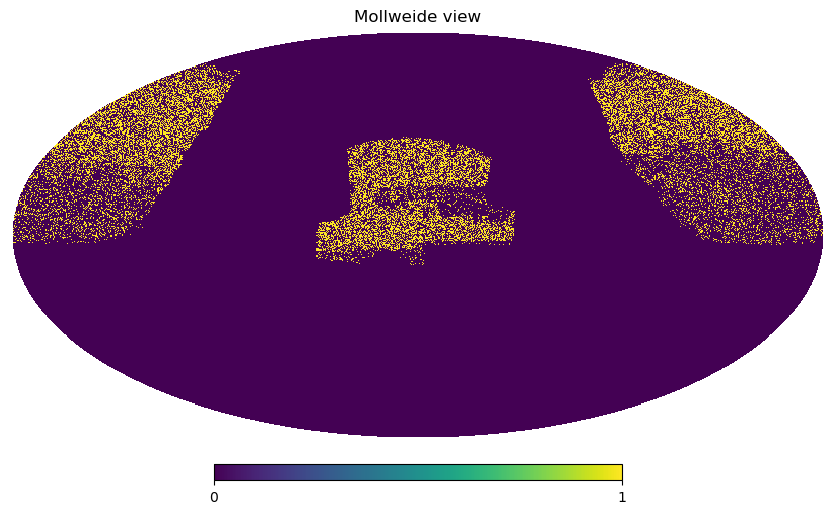

In [49]:
image = np.zeros(hp.nside2npix(2048))
image[hp.ang2pix(2048, np.deg2rad(90-random['dec']), np.deg2rad(random['ra']))] = 1
hp.mollview(image)

In [22]:
np.save('../catalogue/random_new_test_apply_mask', random)

In [3]:
random = np.load('../catalogue/cmass_random.npy')

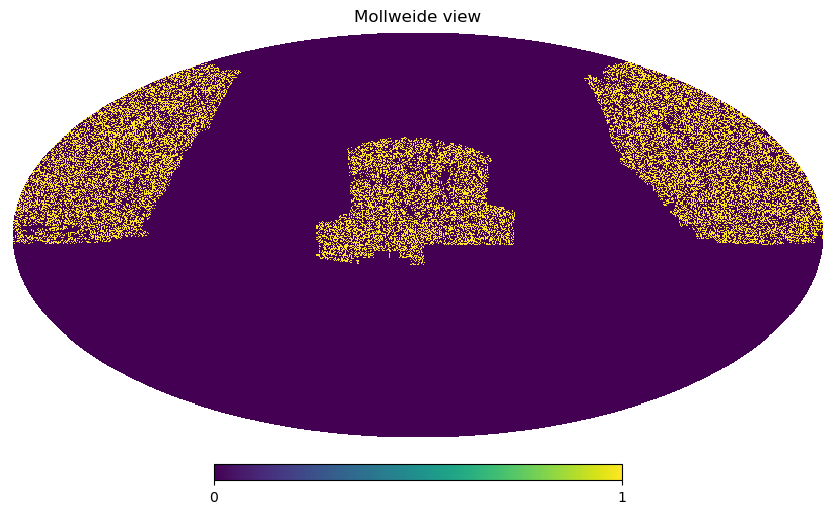

In [4]:
image = np.zeros(hp.nside2npix(2048))
image[hp.ang2pix(2048, np.deg2rad(90-random['dec']), np.deg2rad(random['ra']))] = 1
hp.mollview(image)